In [1]:
from ExoTransit import environ
environ['mpl_backend'] = 'qt5'
from ExoTransit.retrieve import model_transit_lightcurve, test_func
import numpy as np
import matplotlib.pyplot as plt
import os
if os.path.basename(os.getcwd())!='testdata':
    os.chdir('testdata')

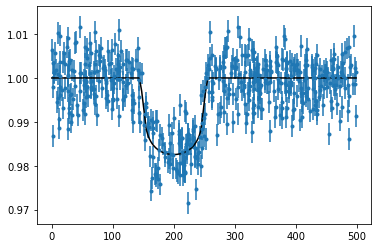

In [2]:
%matplotlib inline
file = 'simdata'
t,f,e,fmod = np.loadtxt(file, unpack=True)
plt.errorbar(t,f,e, fmt='.')
plt.plot(t,fmod,'k')

In [3]:
parlabelnames = ['tcen', 'b', 'Rs/a', 'Rp/Rs', 'fout', 'C2', 'C4']
parnames = ['tcen', 'b', 'rsa', 'rprs', 'fout', 'c2', 'c4']
par0 = [190, 0.1, 0.2, 0.2, 0.98, 0.4, 0.3]
bounds = [(170, 220), (0, 0.5), (0.1, 0.3), (0.1, 0.3), (0.96, 1.06), (0.3, 0.5), (0.25, 0.35)]
par = dict(zip(parnames, par0))
bounds = dict(zip(parnames, bounds))
par.update(gpa=0.005, gptau=1)
bounds.update(gpa=(0.001, 0.1), gptau=(1, 20))

:: MCMCWarning: Not enough number of iteration compared to checkstep. It is suggested to increase the value of Niterate
100%|██████████| 1000/1000 [30:07<00:00,  1.81s/it]


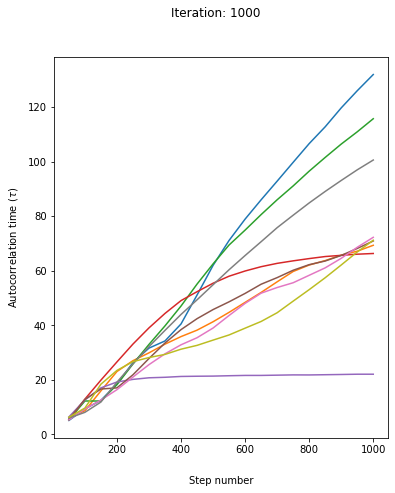

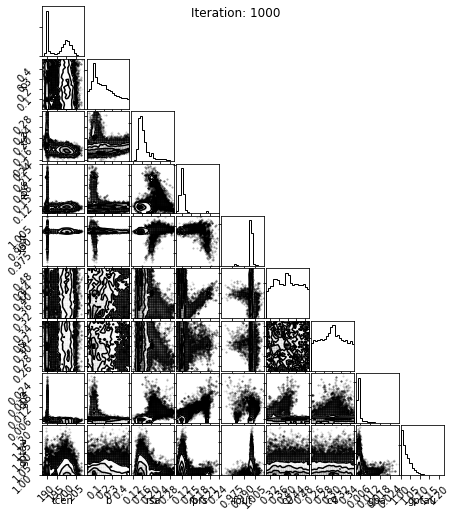

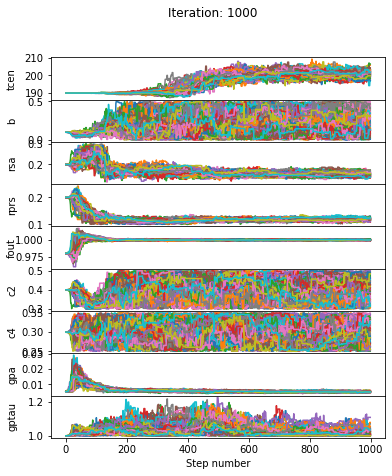

In [4]:
%matplotlib qt5
mlc = model_transit_lightcurve()
mlc.per = 1.5 * 1440
mlc.add_data(file, par, bounds, usecols=(0, 1, 2))
mlc.run_mcmc(mcmc_name='simGP', Nwalker=100, Niterate=1000, monitor='all', checkconvergence=True, showprogress=True)

In [5]:
mlc.get_flatsamples(burn=600)
mlc.saveall(retrieval_skeleton=file+'_skel', params_mcmc=file+'_allmcmcsamples')
mlc.save_median_err_params_mcmc(saveto=file + '_params_mcmc', display=True)

(9, 3)
tcen: 200.812865604397 +1.9866052421280358 -1.9405030709195046
b: 0.2113890917601941 +0.17528075821503575 -0.129443720098818
rsa: 0.15173633917943063 +0.009960391483366415 -0.007940413556363157
rprs: 0.11892608742746456 +0.004423803852434821 -0.004312837761670338
fout: 0.9994815042943266 +0.00043170017618010537 -0.0004681179516928813
c2: 0.40653020547823854 +0.062304851998424726 -0.07104102712188548
c4: 0.2959770254518922 +0.035494178576867375 -0.03244912438037434
gpa: 0.005087576608691259 +0.00037870893677359636 -0.00035651718066036665
gptau: 1.0143887529753108 +0.028164958713863042 -0.011050906235496205


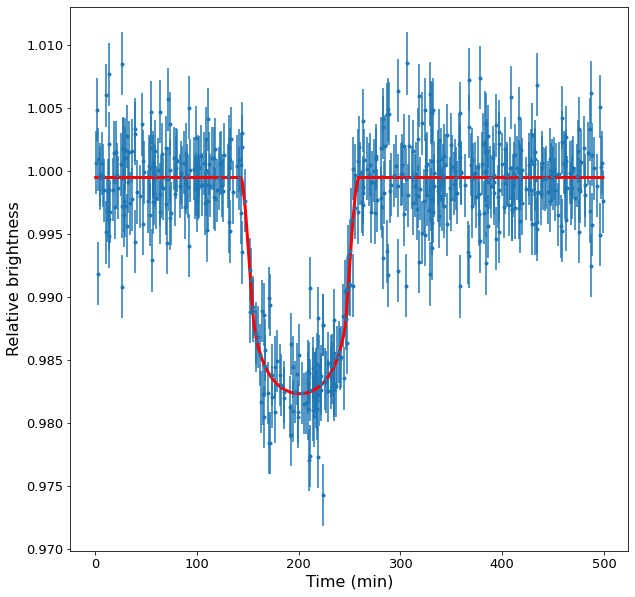

In [6]:
%matplotlib inline
_, ax = mlc.overplot_model_median_err_params_mcmc()
ax.set_ylabel('Relative brightness', size=16)
ax.set_xlabel('Time (min)', size=16)
ax.tick_params(labelsize=13)